In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv(r'C:\Users\sachin\new data_\customer_churn.csv')

In [5]:
df[:8]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


In [6]:
df.shape

(7043, 21)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.drop('customerID', axis=1, inplace=True)

In [10]:
df.shape

(7043, 20)

In [11]:
# note the TotalCharges should be float but in actual it's object type

In [16]:
pd.to_numeric('275')

275

In [17]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [18]:
# Unable to parse string " " at position 488

In [22]:
pd.to_numeric(df.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [23]:
pd.to_numeric(df.TotalCharges, errors='coerce').isna().sum()

11

In [24]:
df[df.TotalCharges==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [25]:
df[df.TotalCharges==' '].shape

(11, 20)

In [26]:
df1 = df[df.TotalCharges!=' ']

In [27]:
df1.shape

(7032, 20)

In [28]:
df.shape

(7043, 20)

In [31]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\sachin\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [32]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [33]:
df1[:8]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


In [34]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [49]:
churn_no = df1[df1.Churn=='No'].tenure
churn_yes = df1[df1.Churn=='Yes'].tenure

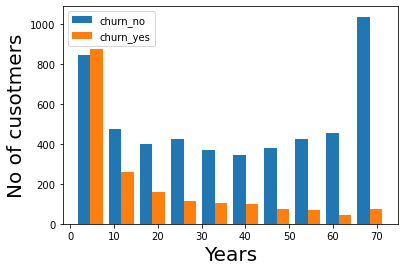

In [51]:
plt.xlabel('Years', fontsize=20)
plt.ylabel('No of cusotmers', fontsize=20)
plt.hist([churn_no, churn_yes], label=['churn_no', 'churn_yes'])
plt.legend()
plt.show()

In [52]:
churn_no = df1[df1.Churn=='No'].MonthlyCharges
churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

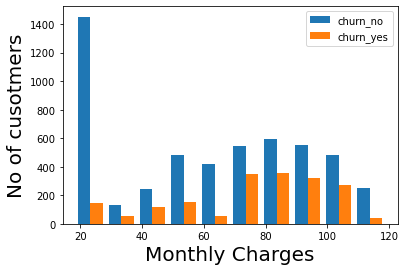

In [53]:
plt.xlabel('Monthly Charges', fontsize=20)
plt.ylabel('No of cusotmers', fontsize=20)
plt.hist([churn_no, churn_yes], label=['churn_no', 'churn_yes'])
plt.legend()
plt.show()

In [54]:
churn_no = df1[df1.Churn=='No'].TotalCharges
churn_yes = df1[df1.Churn=='Yes'].TotalCharges

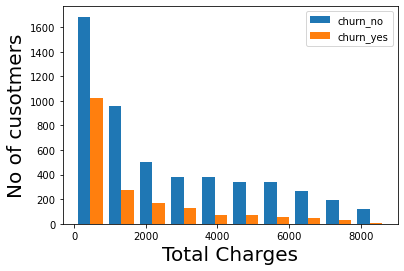

In [55]:
plt.xlabel('Total Charges', fontsize=20)
plt.ylabel('No of cusotmers', fontsize=20)
plt.hist([churn_no, churn_yes], label=['churn_no', 'churn_yes'])
plt.legend()
plt.show()

In [56]:
# Now we have to do label encoding

In [57]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

In [58]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [60]:
df2 = df1.replace(['No phone service', 'No internet service'], 'No')

In [61]:
print_unique_col_values(df2)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [62]:
df2.replace(['Male', 'Female', 'Yes', 'No'], [1, 0, 1, 0], inplace=True)

In [63]:
print_unique_col_values(df2)

InternetService: ['DSL' 'Fiber optic' 0]
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [70]:
df3 = pd.get_dummies(data=df2, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

In [72]:
df3[:8]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0
5,0,0,0,0,8,1,1,0,0,1,...,99.65,820.50,1,0,1,0,0,0,1,0
6,1,0,0,1,22,1,1,0,1,0,...,89.10,1949.40,0,0,1,0,0,1,0,0
7,0,0,0,0,10,0,0,1,0,0,...,29.75,301.90,0,1,0,0,0,0,0,1


In [73]:
df3.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [74]:
df3.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_DSL                        uint8
InternetService_Fiber optic                uint8
Contract_One year                          uint8
Contract_Two year   

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [76]:
col_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
df3[col_to_scale] = scaler.fit_transform(df3[col_to_scale])

In [77]:
df3.MonthlyCharges[:4]

0    0.115423
1    0.385075
2    0.354229
3    0.239303
Name: MonthlyCharges, dtype: float64

In [78]:
x = df3.drop('Churn', axis=1)
y = df3.Churn

In [79]:
from sklearn.model_selection import train_test_split as split
x_train, x_test, y_train, y_test = split(x, y, test_size=.2, random_state=5)

In [80]:
x_train.shape, x_test.shape

((5625, 23), (1407, 23))

In [85]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(23, ), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
176/176 [==============================] - 0s 800us/step - loss: 0.5300 - accuracy: 0.7298
Epoch 2/20
176/176 [==============================] - 0s 805us/step - loss: 0.4386 - accuracy: 0.7940
Epoch 3/20
176/176 [==============================] - 0s 833us/step - loss: 0.4240 - accuracy: 0.8004
Epoch 4/20
176/176 [==============================] - 0s 929us/step - loss: 0.4173 - accuracy: 0.8057
Epoch 5/20
176/176 [==============================] - 0s 889us/step - loss: 0.4150 - accuracy: 0.8009
Epoch 6/20
176/176 [==============================] - 0s 837us/step - loss: 0.4129 - accuracy: 0.8098
Epoch 7/20
176/176 [==============================] - 0s 839us/step - loss: 0.4107 - accuracy: 0.8020
Epoch 8/20
176/176 [==============================] - 0s 861us/step - loss: 0.4109 - accuracy: 0.8059
Epoch 9/20
176/176 [==============================] - 0s 884us/step - loss: 0.4090 - accuracy: 0.8085
Epoch 10/20
176/176 [==============================] - 0s 833us/step - loss: 0.409

In [86]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 904us/step - loss: 0.4406 - accuracy: 0.7925


[0.44061279296875, 0.7924662232398987]

In [87]:
predictions = model.predict(x_test)

In [88]:
predictions[:5]

array([[0.17532068],
       [0.43655503],
       [0.00922436],
       [0.7404323 ],
       [0.55209714]], dtype=float32)

In [89]:
y_pred = [1 if i>=.5 else 0 for i in predictions]

In [90]:
y_pred[:5]

[0, 0, 0, 1, 1]

In [91]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [92]:
from sklearn.metrics import confusion_matrix, classification_report

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.67      0.55      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.79      1407



In [98]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[891, 108],
       [184, 224]], dtype=int64)

In [99]:
matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[891, 108],
       [184, 224]])>

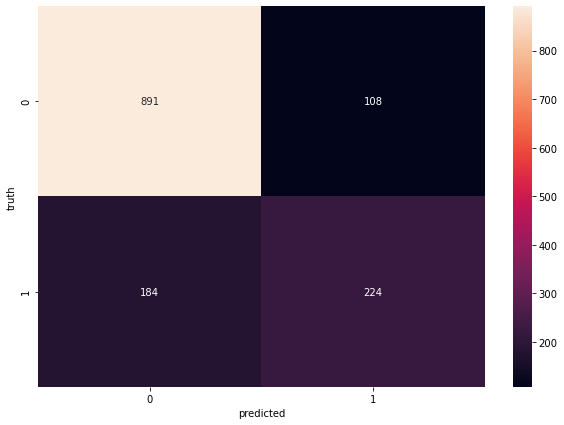

In [101]:
plt.figure(figsize = (10, 7))
sn.heatmap(matrix, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [104]:
model.score(x_test, y_test)

0.7938877043354655